# Fundamentals of Digital Image Processing

## Introduction
Digital image processing involves the manipulation of digital images using algorithms. It has a wide range of applications in various fields such as medical imaging, computer vision, photography, remote sensing, quality control, and more.

In this notebook, we will explore several fundamental image processing techniques using Python. The operations include:
- adjusting brightness and contrast
- filtering
- edge detection
- advanced techniques (e.g., Fourier transform, histogram equalization, and more)

### Objectives:
1. Understand how digital images are represented.
2. Learn common image processing techniques.
3. Apply these techniques to enhance images or extract useful information.

Let’s dive into the practical implementations with explanations for each concept.


In [1]:
# Import required libraries
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, binary_erosion
from skimage import measure
import matplotlib.colors

# Helper function to display images using matplotlib
def display_image(img, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(np.asarray(img), cmap='gray' if img.mode == 'L' else None)
    plt.title(title)
    plt.axis('off')
    plt.show()


## 1. Load and Display an Image

### Theory:
Digital images are composed of pixels, where each pixel represents a color (in RGB images) or intensity value (in grayscale images). The `Pillow` library allows us to open and manipulate image files in Python.

### Why:
We need to load and visualize images before we can apply any processing.

### Application:
- Visualizing the input image before performing any operations.


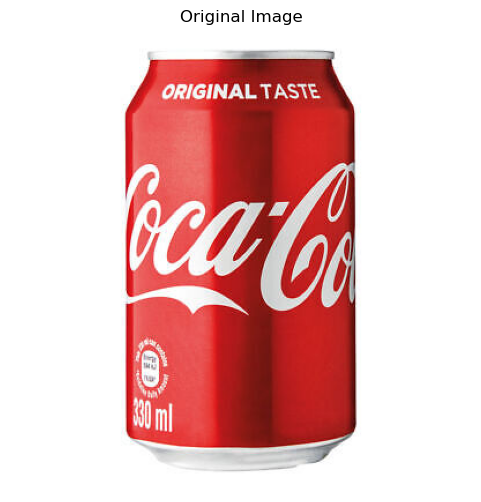

In [2]:
# Load an image
image = Image.open('sample.jpg')

# Display the image
display_image(image, title="Original Image")

## 2. Image Cropping

### Theory:
Cropping is a process of extracting a specific portion of an image. It’s used to focus on a region of interest (ROI) by removing the outer parts.

### Why:
- To focus on a particular part of the image.
- To reduce the image size by removing unnecessary areas.

### Application:
- In photography for composition adjustments.
- In medical imaging to isolate a specific area of interest (e.g., tumor detection).


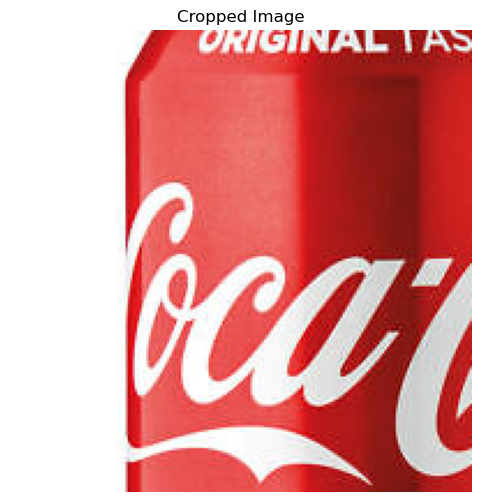

In [3]:
# Crop the image
x_start, y_start, width, height = 50, 50, 200, 200  # Adjust these values as needed
cropped_image = image.crop((x_start, y_start, x_start + width, y_start + height))

# Display the cropped image
display_image(cropped_image, title="Cropped Image")


## 3. Image Rotation

### Theory:
Rotation involves rotating an image by a specified angle. This is a geometric transformation where pixels are repositioned based on a rotation matrix.

### Why:
- Used to adjust image orientation.
- Often necessary when images are taken from different angles or perspectives.

### Application:
- Image correction (e.g., landscape vs portrait).
- Data augmentation in machine learning to increase the diversity of the dataset.



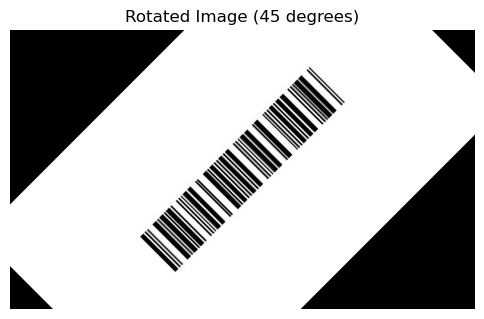

In [38]:
# Rotate the image by 45 degrees
rotated_image = image.rotate(45)

# Display the rotated image
display_image(rotated_image, title="Rotated Image (45 degrees)")


## 4. Adjusting Brightness and Contrast

### Theory:
- **Brightness**: Refers to the overall lightness or darkness of an image. Increasing brightness adds a constant value to each pixel, making the image lighter, while decreasing it makes the image darker.
- **Contrast**: Controls the difference between the light and dark areas of the image. High contrast means strong differences, while low contrast makes the image more uniform.

### Why:
- Enhancing underexposed or overexposed images.
- Highlighting specific features by improving visibility.

### Application:
- Preprocessing step in computer vision tasks like facial recognition.
- Enhancing images for printing or publishing.



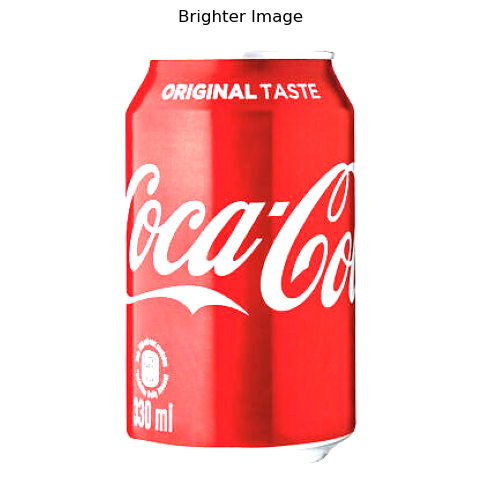

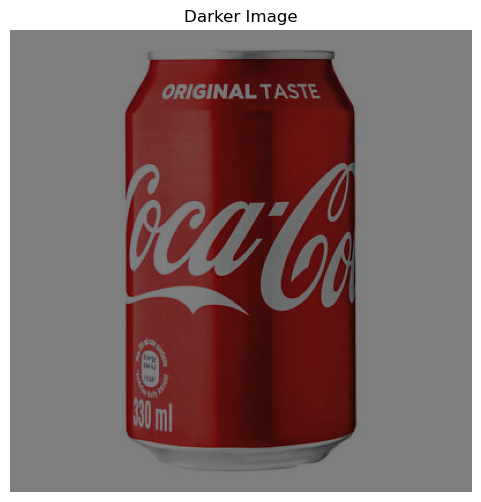

In [5]:
# Adjust brightness and contrast
enhancer_brightness = ImageEnhance.Brightness(image)
bright_image = enhancer_brightness.enhance(1.5)
dark_image = enhancer_brightness.enhance(0.5)

# Display images
display_image(bright_image, title="Brighter Image")
display_image(dark_image, title="Darker Image")


## 5. RGB Channels and Grayscale Conversion

### Theory:
- **RGB Image**: An image where each pixel has three values representing the intensity of Red, Green, and Blue channels.
- **Grayscale Image**: A single-channel image where each pixel represents intensity, ranging from black (0) to white (255).

### Why:
- Grayscale images are used to simplify processing since color is not always necessary.
- RGB channels are used in tasks where color information is important, like object detection or image segmentation.

### Application:
- Face detection in grayscale (simplified for faster computation).
- Object tracking using color information.



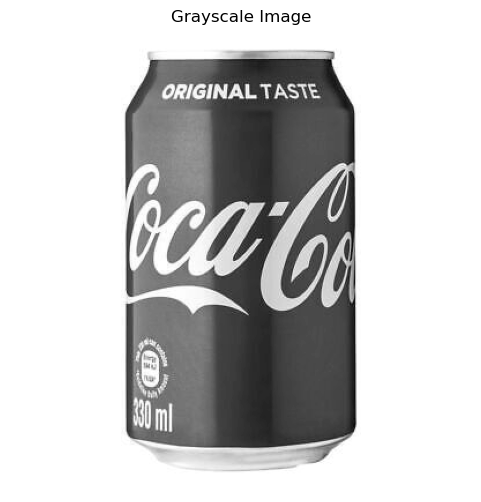

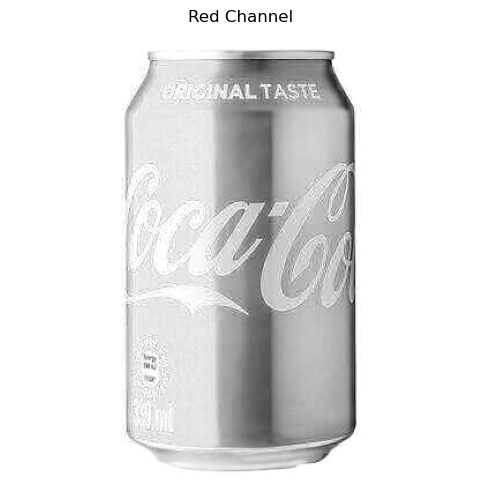

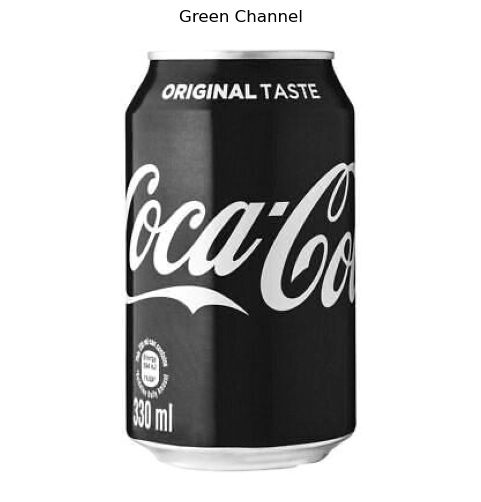

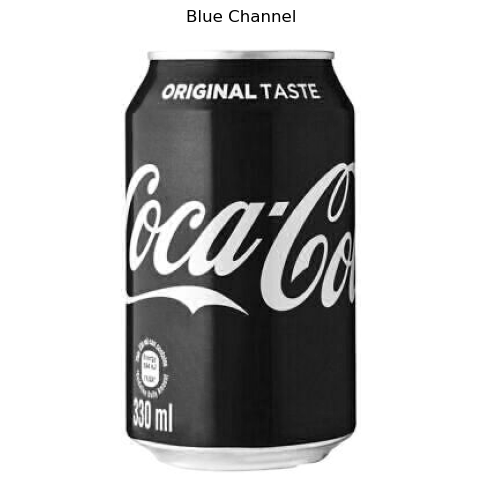

In [20]:
# Convert to grayscale
gray_image = ImageOps.grayscale(image)
display_image(gray_image, title="Grayscale Image")

# Split into R, G, B channels
R, G, B = image.split()
display_image(R, title="Red Channel")
display_image(G, title="Green Channel")
display_image(B, title="Blue Channel")


## 6. Image Filtering (Blurring)

### Theory:
Blurring smoothens an image by reducing noise and detail. A common type of blur is the **Gaussian blur**, where each pixel is averaged with its neighbors using a Gaussian function. A **median filter** replaces each pixel with the median of its neighborhood.

### Why:
- To remove noise and reduce image details.
- Helps in applications like edge detection where noise can hinder accurate results.

### Application:
- Preprocessing step in medical imaging to reduce noise in CT or MRI scans.
- Blurring for artistic effects in photography.



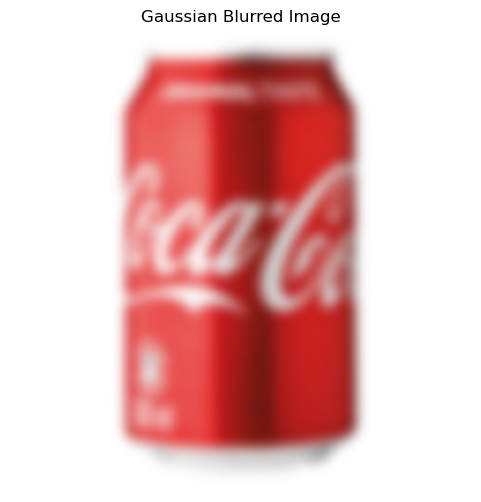

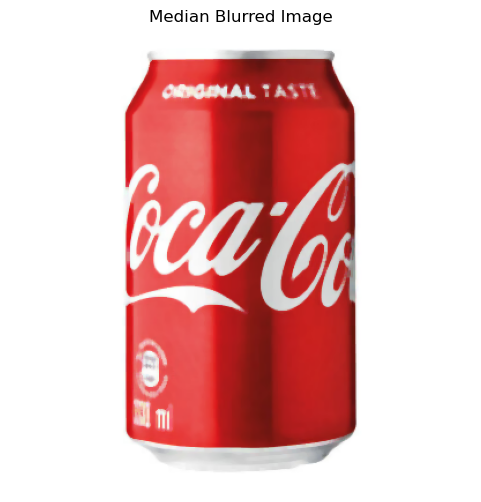

In [7]:
# Apply Gaussian and median filters
gaussian_blur = image.filter(ImageFilter.GaussianBlur(5))
median_blur = image.filter(ImageFilter.MedianFilter(size=5))

# Display the blurred images
display_image(gaussian_blur, title="Gaussian Blurred Image")
display_image(median_blur, title="Median Blurred Image")


## 7. Edge Detection

### Theory:
Edges in an image represent significant transitions in intensity or color. Edge detection algorithms, such as the one used here, help highlight boundaries of objects in an image.

### Why:
- To identify the structure of objects within an image.
- Often used as a preprocessing step for object detection or shape analysis.

### Application:
- Detecting roads in satellite imagery.
- Medical imaging (detecting bones, tumors, etc.).



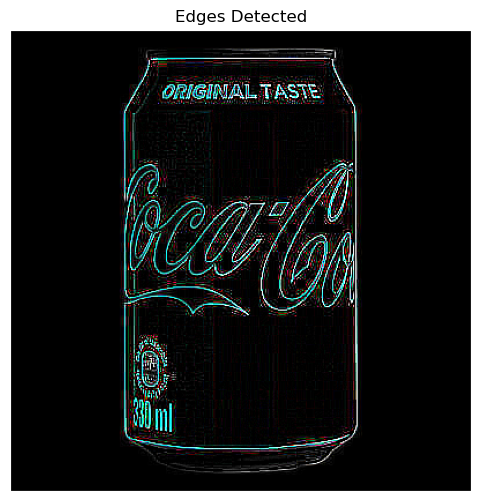

In [8]:
# Edge detection
edges = image.filter(ImageFilter.FIND_EDGES)
display_image(edges, title="Edges Detected")


## 8. Fourier Transform

### Theory:
Fourier Transform decomposes an image into its sine and cosine components. It represents an image in the frequency domain, which is useful for analyzing patterns and repeating structures.

### Why:
- Frequency analysis helps detect repeating patterns or textures.
- Used to filter out noise or emphasize certain frequency components.

### Application:
- Image compression (e.g., JPEG).
- Filtering noise in medical or astronomical images.



# How to Read the FFT of an Image

### 8.1. **FFT Result Layout**
- **Center of FFT output**: Represents **low-frequency components** (smooth areas).
- **Edges/Corners of FFT output**: Represent **high-frequency components** (sharp edges or fine details).

### 8.2. **Logarithmic Scaling**
- Raw FFT values span a wide range, so it's often displayed using **logarithmic scaling** to better visualize small and large values.

### 8.3. **Symmetry of FFT**
- For real-valued images, the FFT is **symmetric**, so only one half needs to be analyzed.

### 8.4. **How to Read a 2D FFT**
- **Bright areas**: Strong frequency components.
- **Dark areas**: Weak frequency components.

#### Key Regions:
- **Low-frequency (center)**: Represents gradual changes, smooth regions.
- **High-frequency (edges/corners)**: Represents sharp transitions, edges, textures.

#### Example Scenarios:
- **Smooth Gradient Image**: Bright center, little to no high frequencies.
- **Sharp Edges (like text)**: Bright points at high frequencies.
- **Repetitive Texture**: Symmetrical bright spots in the frequency domain.

### 8.5. **Visual Interpretation Workflow**
1. Look at the **center** to assess low-frequency content (smoothness).
2. Check the **edges** for high-frequency content (sharp transitions).
3. Identify any **patterns** of bright spots for repetitive structures.
4. Use **log scaling** if necessary to visualize subtle details.

### 8.6. **Common Use Case: Filtering**
- **Low-pass filter**: Keeps low frequencies (smoothes image).
- **High-pass filter**: Keeps high frequencies (enhances edges).

### Conclusion
- FFT transforms spatial data into **frequency data**, where you can analyze and manipulate the image based on its frequency components, providing insight into smoothness, sharpness, and periodic patterns.


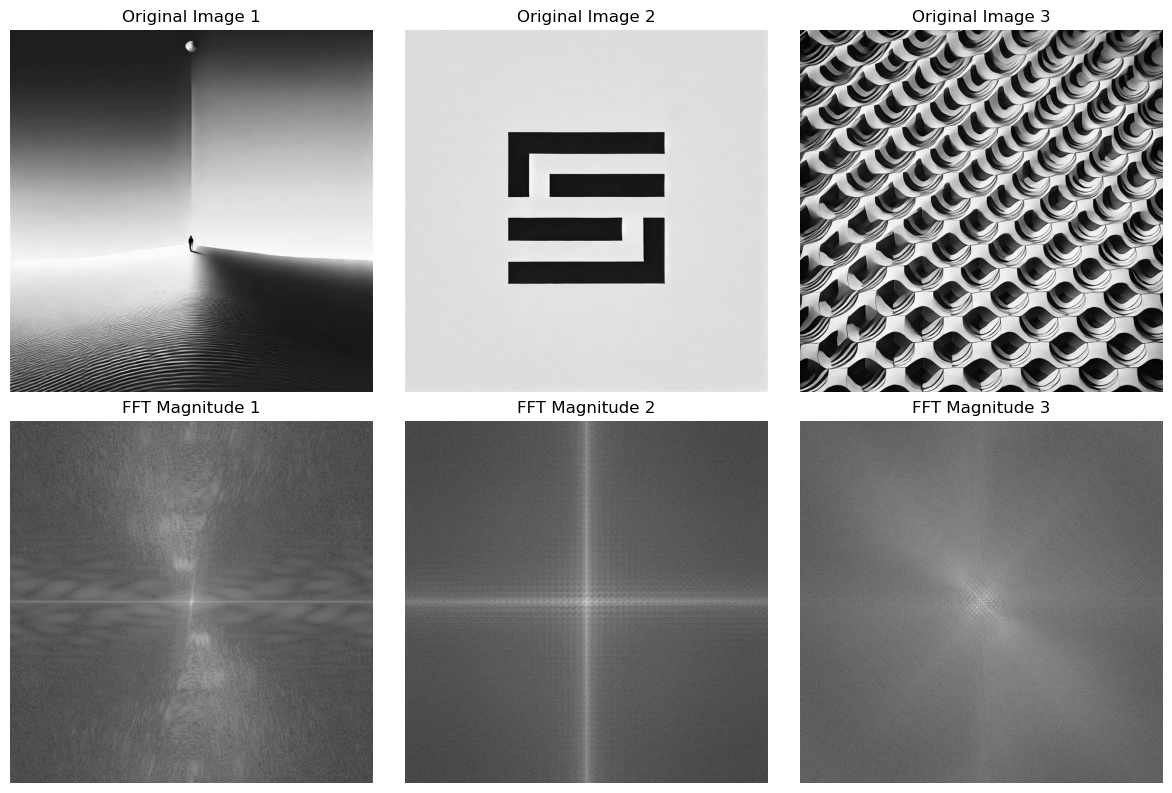

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Function to process and display the FFT for a given image
def process_and_display_fft(image_path, image_num):
    # Load image and convert to grayscale
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    # Perform FFT and shift
    f_transform = np.fft.fft2(img_array)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shift) + 1)  # +1 to avoid log(0)
    
    # Plot original image and its FFT magnitude spectrum
    plt.subplot(2, 3, image_num)
    plt.imshow(img_array, cmap='gray')
    plt.title(f"Original Image {image_num}")
    plt.axis('off')

    plt.subplot(2, 3, image_num + 3)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title(f"FFT Magnitude {image_num}")
    plt.axis('off')

# Create figure for comparison
plt.figure(figsize=(12, 8))

# Process and display FFTs for image1.jpg, image2.jpg, image3.jpg
process_and_display_fft('image1.jpg', 1)  # Image 1 (Smooth Gradient)
process_and_display_fft('image2.jpg', 2)  # Image 2 (Sharp Edges - Text)
process_and_display_fft('image3.jpg', 3)  # Image 3 (Repetitive Texture - Checkerboard)

# Show the comparison
plt.tight_layout()
plt.show()



# Expected FFT Results for Three Images

## 1. **Smooth Gradient Image (Black to White Transition)**
- **Spatial Domain**: A smooth, gradual transition from black on the left to white on the right.
- **FFT Result**:
  - **Low frequencies** dominate due to the gradual intensity change.
  - The FFT will show a **bright center**, representing strong low-frequency components.
  - **Little to no high-frequency content** will be present, as there are no sharp edges or abrupt transitions.

---

## 2. **Sharp Edges (Black Text on White Background)**
- **Spatial Domain**: Sharp black text on a white background, creating clear edges.
- **FFT Result**:
  - **High frequencies** dominate, corresponding to the sharp edges of the text.
  - The FFT will have **bright spots away from the center**, representing the high-frequency components caused by the sharp transitions between black and white.
  - Some brightness near the center will still appear, reflecting the low-frequency content of the white background areas.

---

## 3. **Repetitive Texture (Checkerboard Pattern)**
- **Spatial Domain**: A repeating checkerboard pattern with alternating black and white squares.
- **FFT Result**:
  - The FFT will show **distinct bright spots symmetrically arranged** around the center, indicating the **periodic frequency** of the repeating pattern.
  - These bright spots will be **far from the center**, representing the high-frequency content due to the repeated sharp transitions between black and white squares.
  - The FFT will form a **clear geometric structure** due to the regularity of the checkerboard pattern.

---


## 9. Histogram Equalization

### Theory:
Histogram equalization redistributes the intensity values of an image to improve its contrast. This is particularly useful for images with poor contrast, like underexposed images.

### Why:
- Enhances contrast to reveal hidden details in dark or bright images.
- Makes the intensity distribution more uniform.

### Application:
- Medical imaging (X-rays, MRI scans) to highlight details.
- Enhancing satellite imagery for better interpretation.



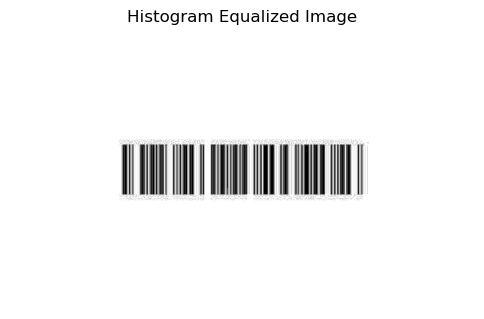

In [26]:
# Histogram equalization
equalized_image = ImageOps.equalize(gray_image)
display_image(equalized_image, title="Histogram Equalized Image")


## 10. Sharpening

### Theory:
Sharpening enhances the edges and fine details of an image by highlighting transitions in intensity. It increases the contrast between adjacent pixels, making edges more prominent.

### Why:
- To enhance the clarity of edges and details.
- Improves the visibility of small or blurred features.

### Application:
- Medical imaging (making details in scans more visible).
- Improving the sharpness of images for printing or presentation.



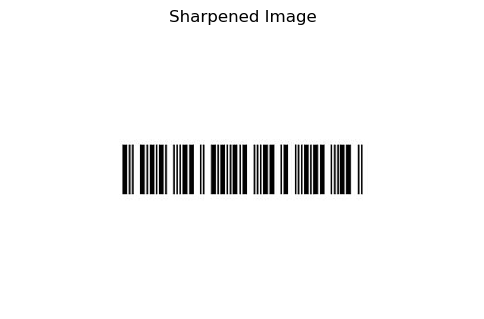

In [27]:
# Apply sharpening filter
sharpened_image = image.filter(ImageFilter.SHARPEN)
display_image(sharpened_image, title="Sharpened Image")


## 11. Thresholding (Binarization)

### Theory:
Thresholding converts an image into a binary image, where each pixel is either black or white. This is based on a threshold value that separates light pixels from dark pixels.

### Why:
- Simplifies the image for tasks like segmentation.
- Highlights structures by separating foreground from background.

### Application:
- Optical character recognition (OCR).
- Object detection and segmentation in medical imaging.



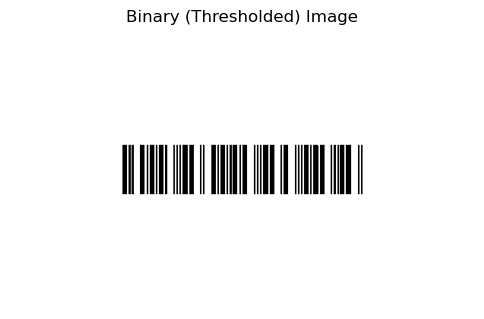

In [28]:
# Binary thresholding
threshold_value = 128
binary_image = gray_image.point(lambda p: p > threshold_value and 255)
display_image(binary_image, title="Binary (Thresholded) Image")


## 12. Color Transformation (HSV Color Space)

### Theory:
The **HSV color space** represents colors using three components: Hue (color type), Saturation (color intensity), and Value (brightness). This is often more intuitive for color manipulation than the RGB model.

### Why:
- Easier manipulation of color properties like brightness and saturation.
- Useful for color-based segmentation.

### Application:
- Color segmentation in computer vision.
- Artistic image enhancements by adjusting hue and saturation.



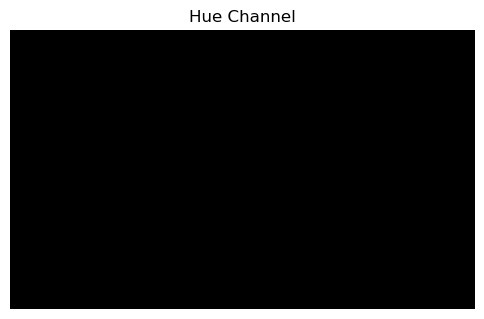

In [29]:
# Convert RGB to HSV
hsv_image = np.array(image.convert('RGB')) / 255.0
hsv_image = matplotlib.colors.rgb_to_hsv(hsv_image)

# Extract the Hue Channel
hue_channel = hsv_image[:, :, 0]  # The hue channel is the first channel

# Display the Hue Channel
display_image(Image.fromarray(np.uint8(hue_channel * 255)), title="Hue Channel")


## 13. Morphological Operations (Dilation and Erosion)

### Theory:
- **Dilation**: Adds pixels to the boundaries of objects, expanding them.
- **Erosion**: Removes pixels from the object boundaries, shrinking them.
These operations are performed on binary images and help refine object structures.

### Why:
- Useful for noise removal and enhancing shapes.
- Often used in tasks like image segmentation and object recognition.

### Application:
- Cleaning up noise in medical imaging.
- Enhancing boundaries in satellite imagery.



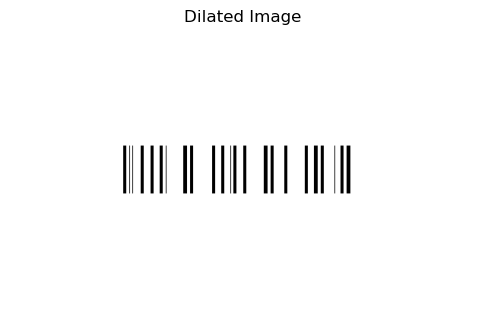

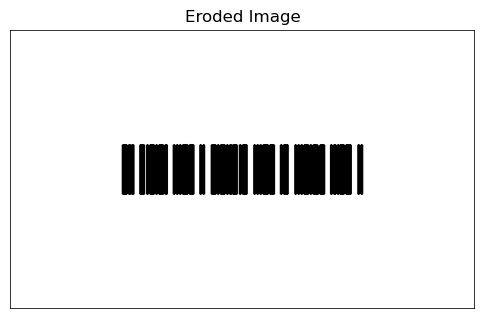

In [30]:
# Dilation and Erosion
binary_np_image = np.array(gray_image.point(lambda p: p > 128 and 1))
dilated_image = binary_dilation(binary_np_image).astype(np.uint8) * 255
eroded_image = binary_erosion(binary_np_image).astype(np.uint8) * 255

# Display the results
display_image(Image.fromarray(dilated_image), title="Dilated Image")
display_image(Image.fromarray(eroded_image), title="Eroded Image")


## 14. Noise Addition (Gaussian Noise)

### Theory:
Noise refers to unwanted variations in an image, often due to sensor limitations. Gaussian noise is a common type, modeled as random values added to pixel intensities.

### Why:
- Adding noise can simulate real-world conditions for testing algorithms.
- Useful in data augmentation for training machine learning models.

### Application:
- Simulating noisy environments in computer vision tasks.
- Testing the robustness of image enhancement algorithms.



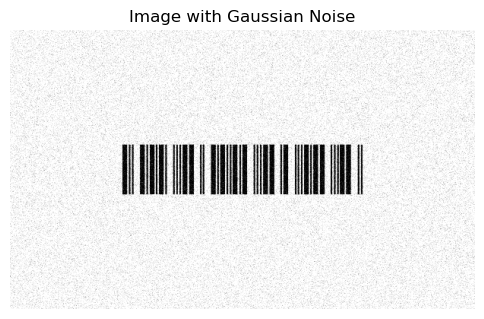

In [31]:
def add_gaussian_noise(image, mean=0, std=25):
    # Convert the image to a numpy array
    image_np = np.array(image)
    
    # Check if the image is grayscale or RGB
    if len(image_np.shape) == 2:  # Grayscale image
        noisy_image = image_np + np.random.normal(mean, std, image_np.shape)
    else:  # RGB image
        noisy_image = image_np + np.random.normal(mean, std, image_np.shape)

    # Clip the values to be in the valid range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    
    return Image.fromarray(noisy_image)



# Add Gaussian noise
noisy_image = add_gaussian_noise(image)
display_image(noisy_image, title="Image with Gaussian Noise")


## 15. Denoising (Median Filter)

### Theory:
Denoising removes noise from an image to improve its quality. The **median filter** is effective in removing salt-and-pepper noise while preserving edges.

### Why:
- To restore image quality after noise addition.
- Reduces noise while maintaining the important features of the image.

### Application:
- Enhancing images captured in noisy environments (e.g., low light).
- Preprocessing step in medical imaging to remove noise from scans.



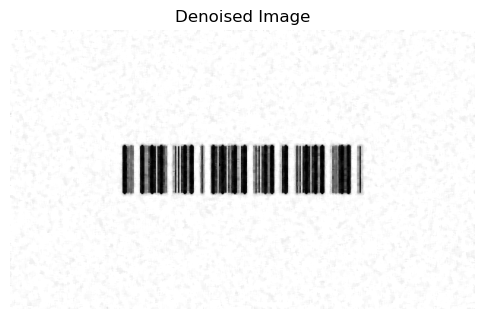

In [32]:
# Denoising with a median filter
denoised_image = noisy_image.filter(ImageFilter.MedianFilter(size=5))
display_image(denoised_image, title="Denoised Image")


## 16. Affine Transformations (Shearing)

### Theory:
Affine transformations include translation, scaling, rotation, and shearing. **Shearing** distorts the image by slanting it in a specific direction, altering its geometric shape.

### Why:
- Shearing is used for data augmentation in machine learning.
- Creates different perspectives of an object or scene.

### Application:
- Data augmentation in computer vision tasks (e.g., object detection).
- Geometric transformations in image editing.



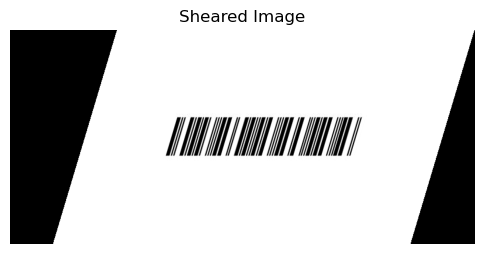

In [33]:
# Shearing the image by applying an affine transformation
def shear_image(image, shear_factor=0.3):
    width, height = image.size
    xshift = abs(shear_factor) * width
    new_width = width + int(round(xshift))
    affine_matrix = (1, shear_factor, -xshift if shear_factor > 0 else 0, 0, 1, 0)
    return image.transform((new_width, height), Image.AFFINE, affine_matrix, Image.BICUBIC)

# Shearing the image
sheared_image = shear_image(image)
display_image(sheared_image, title="Sheared Image")


## 17. Image Resizing and Resampling

### Theory:
Resizing an image involves changing its dimensions (height and width). Resampling determines how pixels are interpolated during scaling, affecting the quality of the resized image.

### Why:
- To fit an image into a specific size requirement.
- To reduce computational cost by resizing large images.

### Application:
- Preprocessing step in machine learning models.
- Resizing images for web or social media platforms.



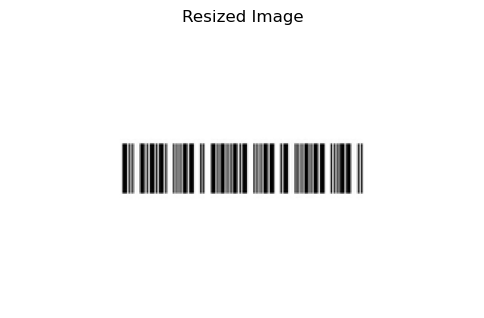

In [34]:
# Resize the image using LANCZOS filter
new_size = (int(image.width * 0.5), int(image.height * 0.5))
resized_image = image.resize(new_size, Image.LANCZOS)

# Display the resized image
display_image(resized_image, title="Resized Image")


## 18. Contour Detection

### Theory:
Contours are curves that connect continuous points along a boundary with the same intensity or color. Contour detection helps identify shapes and structures in an image.

### Why:
- To detect objects or shapes in an image.
- Useful for tasks like image segmentation and shape analysis.

### Application:
- Object detection in satellite or drone imagery.
- Shape analysis in computer vision tasks.



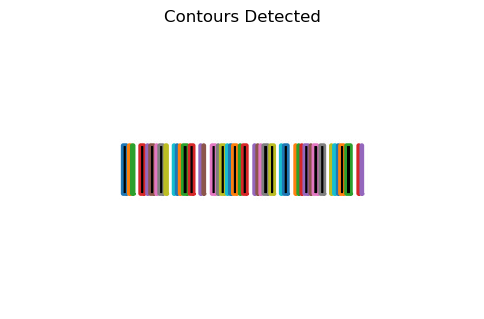

In [35]:
# Contour detection
contours = measure.find_contours(binary_np_image, 0.8)
plt.figure(figsize=(6, 6))
plt.imshow(np.asarray(image), cmap='gray')
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.title("Contours Detected")
plt.axis('off')
plt.show()


## 19. Convolution of Images

### Theory:
Convolution is a process of applying a kernel (filter) to an image by sliding it over the image and computing the sum of element-wise multiplications. The result is a transformed version of the image based on the kernel used.

### Why:
- Convolution is used to apply effects like blurring, sharpening, edge detection, and more.
- Many common image processing tasks rely on convolution, including image enhancement and feature extraction.

### Common Filters (Kernels):
1. **Identity Filter**: Leaves the image unchanged.
2. **Blurring Filter**: Smoothens the image by averaging pixel values.
3. **Sharpening Filter**: Highlights edges and fine details.
4. **Edge Detection Filters**: Sobel and Prewitt filters are common for detecting vertical and horizontal edges.

### Application:
- Used in computer vision tasks for feature extraction.
- Applied in image processing pipelines for tasks like denoising and edge detection.


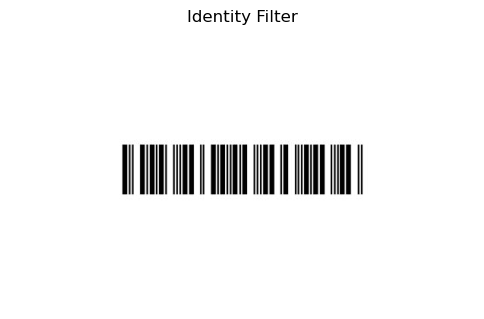

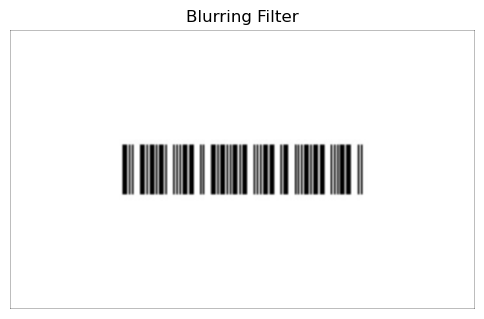

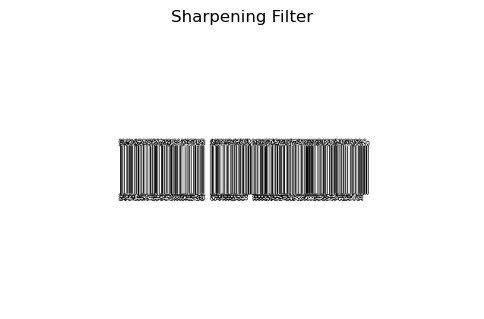

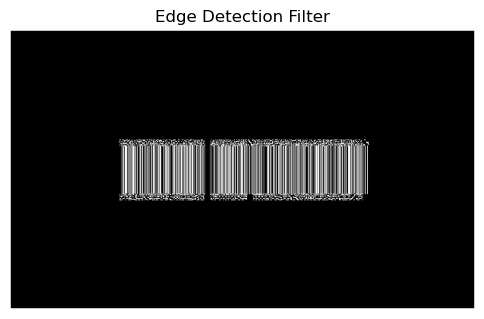

In [40]:
# Define a function to perform convolution
def convolve(image, kernel):
    image_np = np.array(image.convert('L'))  # Convert to grayscale if it's an RGB image
    output = np.zeros_like(image_np)  # Prepare the output array with the same size

    # Get the dimensions of the image and the kernel
    img_height, img_width = image_np.shape
    kernel_height, kernel_width = kernel.shape

    # Define the padding to handle borders (for same-size output)
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image_np, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Perform the convolution
    for i in range(img_height):
        for j in range(img_width):
            # Extract the region of interest (ROI) in the image
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Apply the convolution (element-wise multiplication and summation)
            output[i, j] = np.sum(region * kernel)

    # Normalize the output to the range [0, 255] and convert to uint8
    output = np.clip(output, 0, 255).astype(np.uint8)
    
    return Image.fromarray(output)

# Define some common kernels (filters)
identity_kernel = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

blur_kernel = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]]) / 9.0  # Averaging filter (blurring)

sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

edge_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])  # Simple edge detection kernel

# Apply the filters
identity_image = convolve(image, identity_kernel)
blur_image = convolve(image, blur_kernel)
sharpen_image = convolve(image, sharpen_kernel)
edge_image = convolve(image, edge_kernel)

# Display the results
display_image(identity_image, title="Identity Filter")
display_image(blur_image, title="Blurring Filter")
display_image(sharpen_image, title="Sharpening Filter")
display_image(edge_image, title="Edge Detection Filter")
